In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('../temp_data/histData.csv')

In [7]:
df.tail()

,date,open,high,low,close,volume
22782,2019-12-05 04:30:00+08:00,1.617000,1.617175,1.616900,1.617100,-1
22783,2019-12-05 04:35:00+08:00,1.617100,1.617275,1.616975,1.616975,-1
22784,2019-12-05 04:40:00+08:00,1.616975,1.617050,1.616725,1.616800,-1
22785,2019-12-05 04:45:00+08:00,1.616800,1.616900,1.616725,1.616800,-1
22786,2019-12-05 04:50:00+08:00,1.616800,1.616950,1.616750,1.616800,-1


### Moving Averages

In [10]:
ma_wilder = df.close.ewm(span=40).mean()

In [11]:
ma_wilder2 = df.close.ewm(span=80).mean()

In [12]:
df1 = df.assign(ma_w = ma_wilder)

In [13]:
df2 = df1.assign(ma_w2 = ma_wilder2)

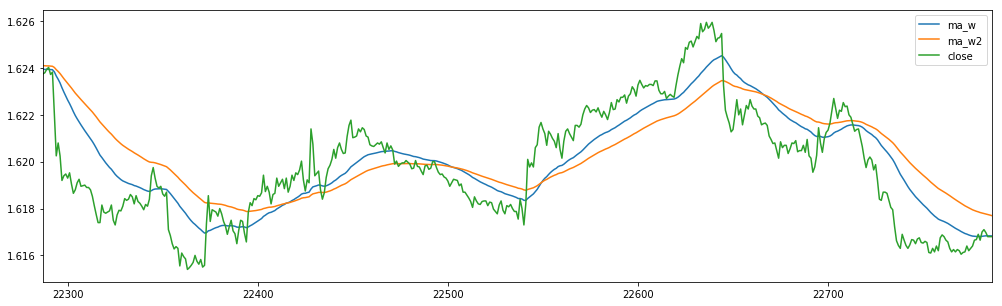

In [14]:
df2[['ma_w','ma_w2', 'close']][-500:].plot(figsize=(17,5));

In [15]:
#df2.to_csv('new_data1.csv')

In [16]:
highLow = (df.high - df.low) * 10000

In [17]:
vol = highLow.rolling(window=480).mean()

In [18]:
vol_norm= abs((vol - vol.rolling(window=480).mean()) / vol.rolling(window=480).std())

In [19]:
df3 = df2.assign(vol_norm = abs(vol_norm))

In [20]:
df4 = df3.dropna()

In [21]:
df4.to_csv('new_data1.csv')

In [42]:
vol_norm.describe()

count    21829.000000
mean         1.235449
std          0.755518
min          0.000125
25%          0.689800
50%          1.130585
75%          1.714614
max          6.071611
dtype: float64

In [8]:
def generate_indicators(dataframe):
    
    df = dataframe
    # fast moving average
    ma_wilder = df.close.ewm(span=20).mean()
    # slow moving average
    ma_wilder2 = df.close.ewm(span=40).mean()
    # high low calculation
    highLow = (df.high - df.low) * 10000
    # rolling window for volatility
    vol = highLow.rolling(window=480).mean()
    # absolute normalized volatility
    vol_norm= abs((vol - vol.rolling(window=480).mean()) / vol.rolling(window=480).std())
    # add fast moving average in the dataframe
    df1 = df.assign(ma_w = ma_wilder)
    # add slow moving average in the dataframe
    df2 = df1.assign(ma_w2 = ma_wilder2)
    # add volatility in the dataframe
    df3 = df2.assign(vol_norm = abs(vol_norm))
    # return the dataframe
    return df3
    

In [9]:
generate_indicators(df)

,date,open,high,low,close,volume,ma_w,ma_w2,vol_norm
0,2019-08-15 05:15:00+08:00,1.650750,1.650775,1.650500,1.650600,-1,1.650600,1.650600,NaN
1,2019-08-15 05:20:00+08:00,1.650600,1.650675,1.650550,1.650550,-1,1.650574,1.650574,NaN
2,2019-08-15 05:25:00+08:00,1.650550,1.650925,1.650550,1.650850,-1,1.650675,1.650671,NaN
3,2019-08-15 05:30:00+08:00,1.650850,1.651225,1.650500,1.651025,-1,1.650776,1.650766,NaN
4,2019-08-15 05:35:00+08:00,1.651025,1.651325,1.651025,1.651200,-1,1.650879,1.650862,NaN
...,...,...,...,...,...,...,...,...,...
22782,2019-12-05 04:30:00+08:00,1.617000,1.617175,1.616900,1.617100,-1,1.616585,1.616829,1.006615
22783,2019-12-05 04:35:00+08:00,1.617100,1.617275,1.616975,1.616975,-1,1.616622,1.616836,0.988068
22784,2019-12-05 04:40:00+08:00,1.616975,1.617050,1.616725,1.616800,-1,1.616639,1.616834,0.977019
22785,2019-12-05 04:45:00+08:00,1.616800,1.616900,1.616725,1.616800,-1,1.616654,1.616832,0.937827


### Load Live Data

In [22]:
df0 = pd.read_csv('../temp_data/live_2.csv')

In [23]:
df0.describe()

,open,high,low,close,volume
count,711.000000,711.000000,711.000000,711.000000,711.000000
mean,1.616661,1.616940,1.616359,1.616657,-0.998594
std,0.002866,0.002825,0.002908,0.002860,0.037503
min,1.610200,1.610400,1.609525,1.610200,-1.000000
25%,1.614437,1.614850,1.614013,1.614437,-1.000000
50%,1.617275,1.617475,1.617025,1.617275,-1.000000
75%,1.618900,1.619100,1.618688,1.618888,-1.000000
max,1.623100,1.623500,1.621800,1.623100,0.000000


In [24]:
df1 = generate_indicators(df0)

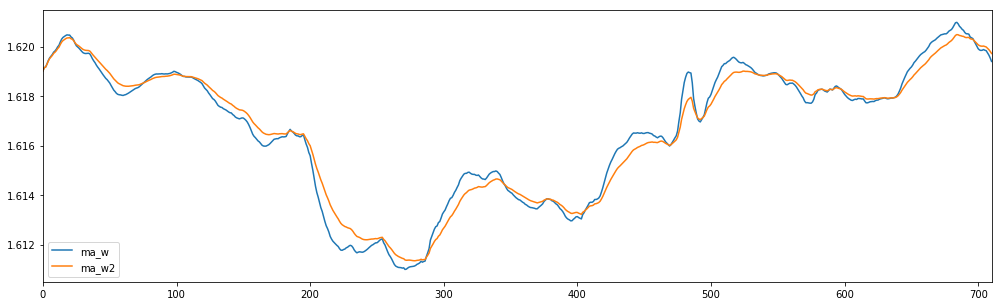

In [26]:
df1[['ma_w', 'ma_w2']].plot(figsize=(17,5));

In [28]:
for ma_w, ma_w2, prev_ma_w, prev_ma_w2 in zip(df1.ma_w, df1.ma_w2, df1.ma_w.shift(1), df1.ma_w2.shift(1)):
    
    if (ma_w > ma_w2) and (prev_ma_w < prev_ma_w2):
        
        print('Long signal generated')

Long signal generated
Long signal generated
Long signal generated
Long signal generated
Long signal generated
Long signal generated
Long signal generated
Long signal generated
Long signal generated
Long signal generated
Long signal generated
Long signal generated
